# CLUSTERING ANALYSIS

 Understanding and Implementing K-Means, Hierarchical, and DBSCAN Algorithms

Objective:
The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.
Datasets :
Data Preprocessing:
1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
3.	Use multiple visualizations to understand the hidden patterns in the dataset
Implementing Clustering Algorithms:
•	Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.
•	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.
•	Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

Cluster Analysis and Interpretation:
•	Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.

Visualization:
Visualize the clustering results using scatter plots or other suitable visualization techniques.
Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.
Evaluation and Performance Metrics:
Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.


## 1. Data Preprocessing

#### Steps:

In [5]:
# Handle Missing Values: Impute or drop missing values.
# Remove Outliers: Use Z-scores or IQR-based methods.
# Feature Scaling: Apply standardization to ensure features are on the same scale.

In [6]:
#K-Means Clustering – Partitions data into K clusters by minimizing the variance within each cluster.
#Hierarchical Clustering – Creates a tree-like structure (dendrogram) using agglomerative (bottom-up) or divisive (top-down) clustering.
#DBSCAN (Density-Based Spatial Clustering of Applications with Noise) – Identifies clusters based on density, making it useful for discovering irregularly shaped clusters.

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

### 1.Data Preprocessing

In [9]:
# Load dataset
df = pd.read_excel(r'C:/Users/DELL/Desktop/DATAsets/EastWestAirlines.xlsx', sheet_name = "data")
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


##### Handling Missing Values

In [11]:
print(df.isnull().sum()) 

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [12]:
# No missing values

##### Handling Outliers

In [14]:
#Outliers can affect clustering results. Box plots help in identifying outliers:
import seaborn as sns
import matplotlib.pyplot as plt

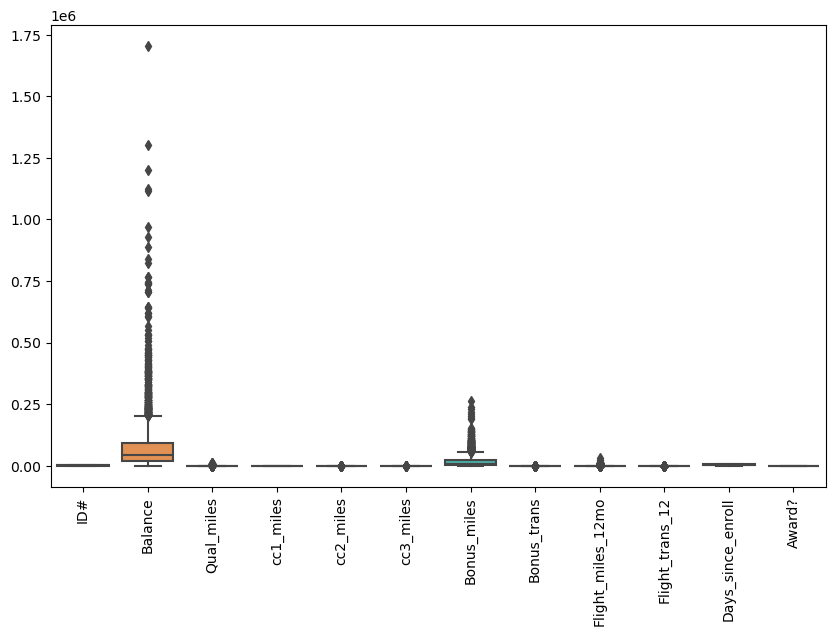

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)  # Rotate labels for better visibility
plt.show()

In [16]:
##### Remove Outliers Using the IQR Method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [17]:
Q1

ID#                   1010.5
Balance              18527.5
Qual_miles               0.0
cc1_miles                1.0
cc2_miles                1.0
cc3_miles                1.0
Bonus_miles           1250.0
Bonus_trans              3.0
Flight_miles_12mo        0.0
Flight_trans_12          0.0
Days_since_enroll     2330.0
Award?                   0.0
Name: 0.25, dtype: float64

In [18]:
Q3

ID#                   3020.5
Balance              92404.0
Qual_miles               0.0
cc1_miles                3.0
cc2_miles                1.0
cc3_miles                1.0
Bonus_miles          23800.5
Bonus_trans             17.0
Flight_miles_12mo      311.0
Flight_trans_12          1.0
Days_since_enroll     5790.5
Award?                   1.0
Name: 0.75, dtype: float64

In [19]:
IQR

ID#                   2010.0
Balance              73876.5
Qual_miles               0.0
cc1_miles                2.0
cc2_miles                0.0
cc3_miles                0.0
Bonus_miles          22550.5
Bonus_trans             14.0
Flight_miles_12mo      311.0
Flight_trans_12          1.0
Days_since_enroll     3460.5
Award?                   1.0
dtype: float64

In [20]:
df_cleaned.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0


##### Feature Scaling

In [22]:
#Clustering algorithms like K-Means and DBSCAN are sensitive to the scale of features. We normalize data using Standardization:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned)

In [23]:
df_scaled

array([[-1.83464329, -0.43885929,  0.        , ..., -0.40970772,
         1.50369284, -0.62307163],
       [-1.83377495, -0.64773487,  0.        , ..., -0.40970772,
         1.48803468, -0.62307163],
       [-1.83290661, -0.1287733 ,  0.        , ..., -0.40970772,
         1.52032964, -0.62307163],
       ...,
       [ 1.65435035,  0.62802805,  0.        , ..., -0.40970772,
        -1.23550729,  1.60495191],
       [ 1.65521869,  0.18915227,  0.        , ...,  1.65318143,
        -1.23599661, -0.62307163],
       [ 1.65608703, -1.02863529,  0.        , ..., -0.40970772,
        -1.23746456, -0.62307163]])

### 2 Exploratory Data Analysis (EDA)

##### Visualizing Data Distribution

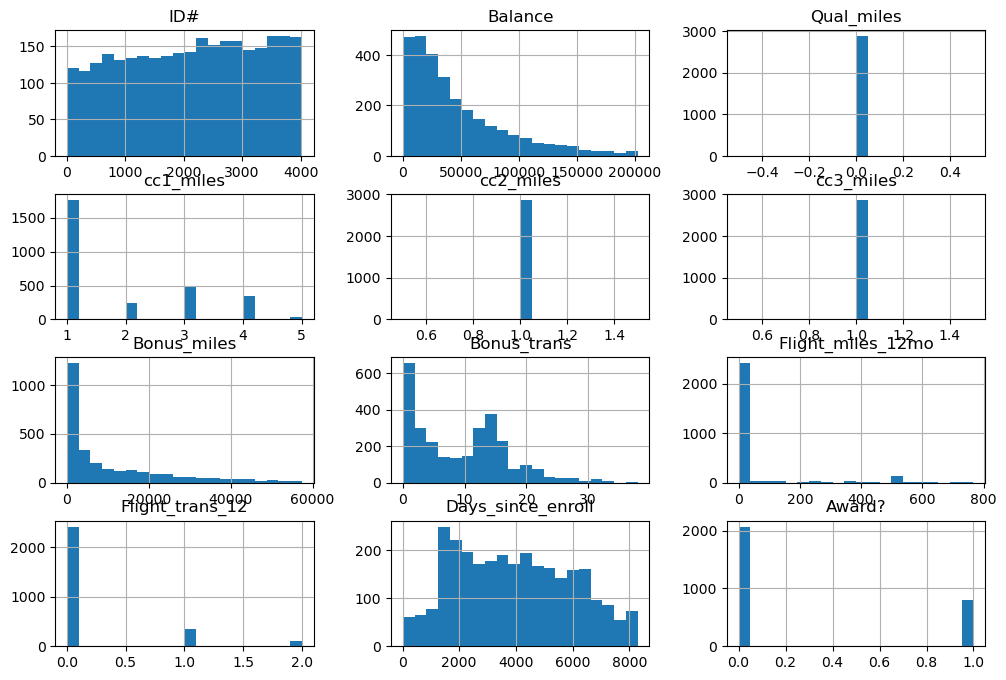

In [26]:
df_cleaned.hist(figsize=(12, 8), bins=20)
plt.show()

##### Pairplot to Identify Patterns

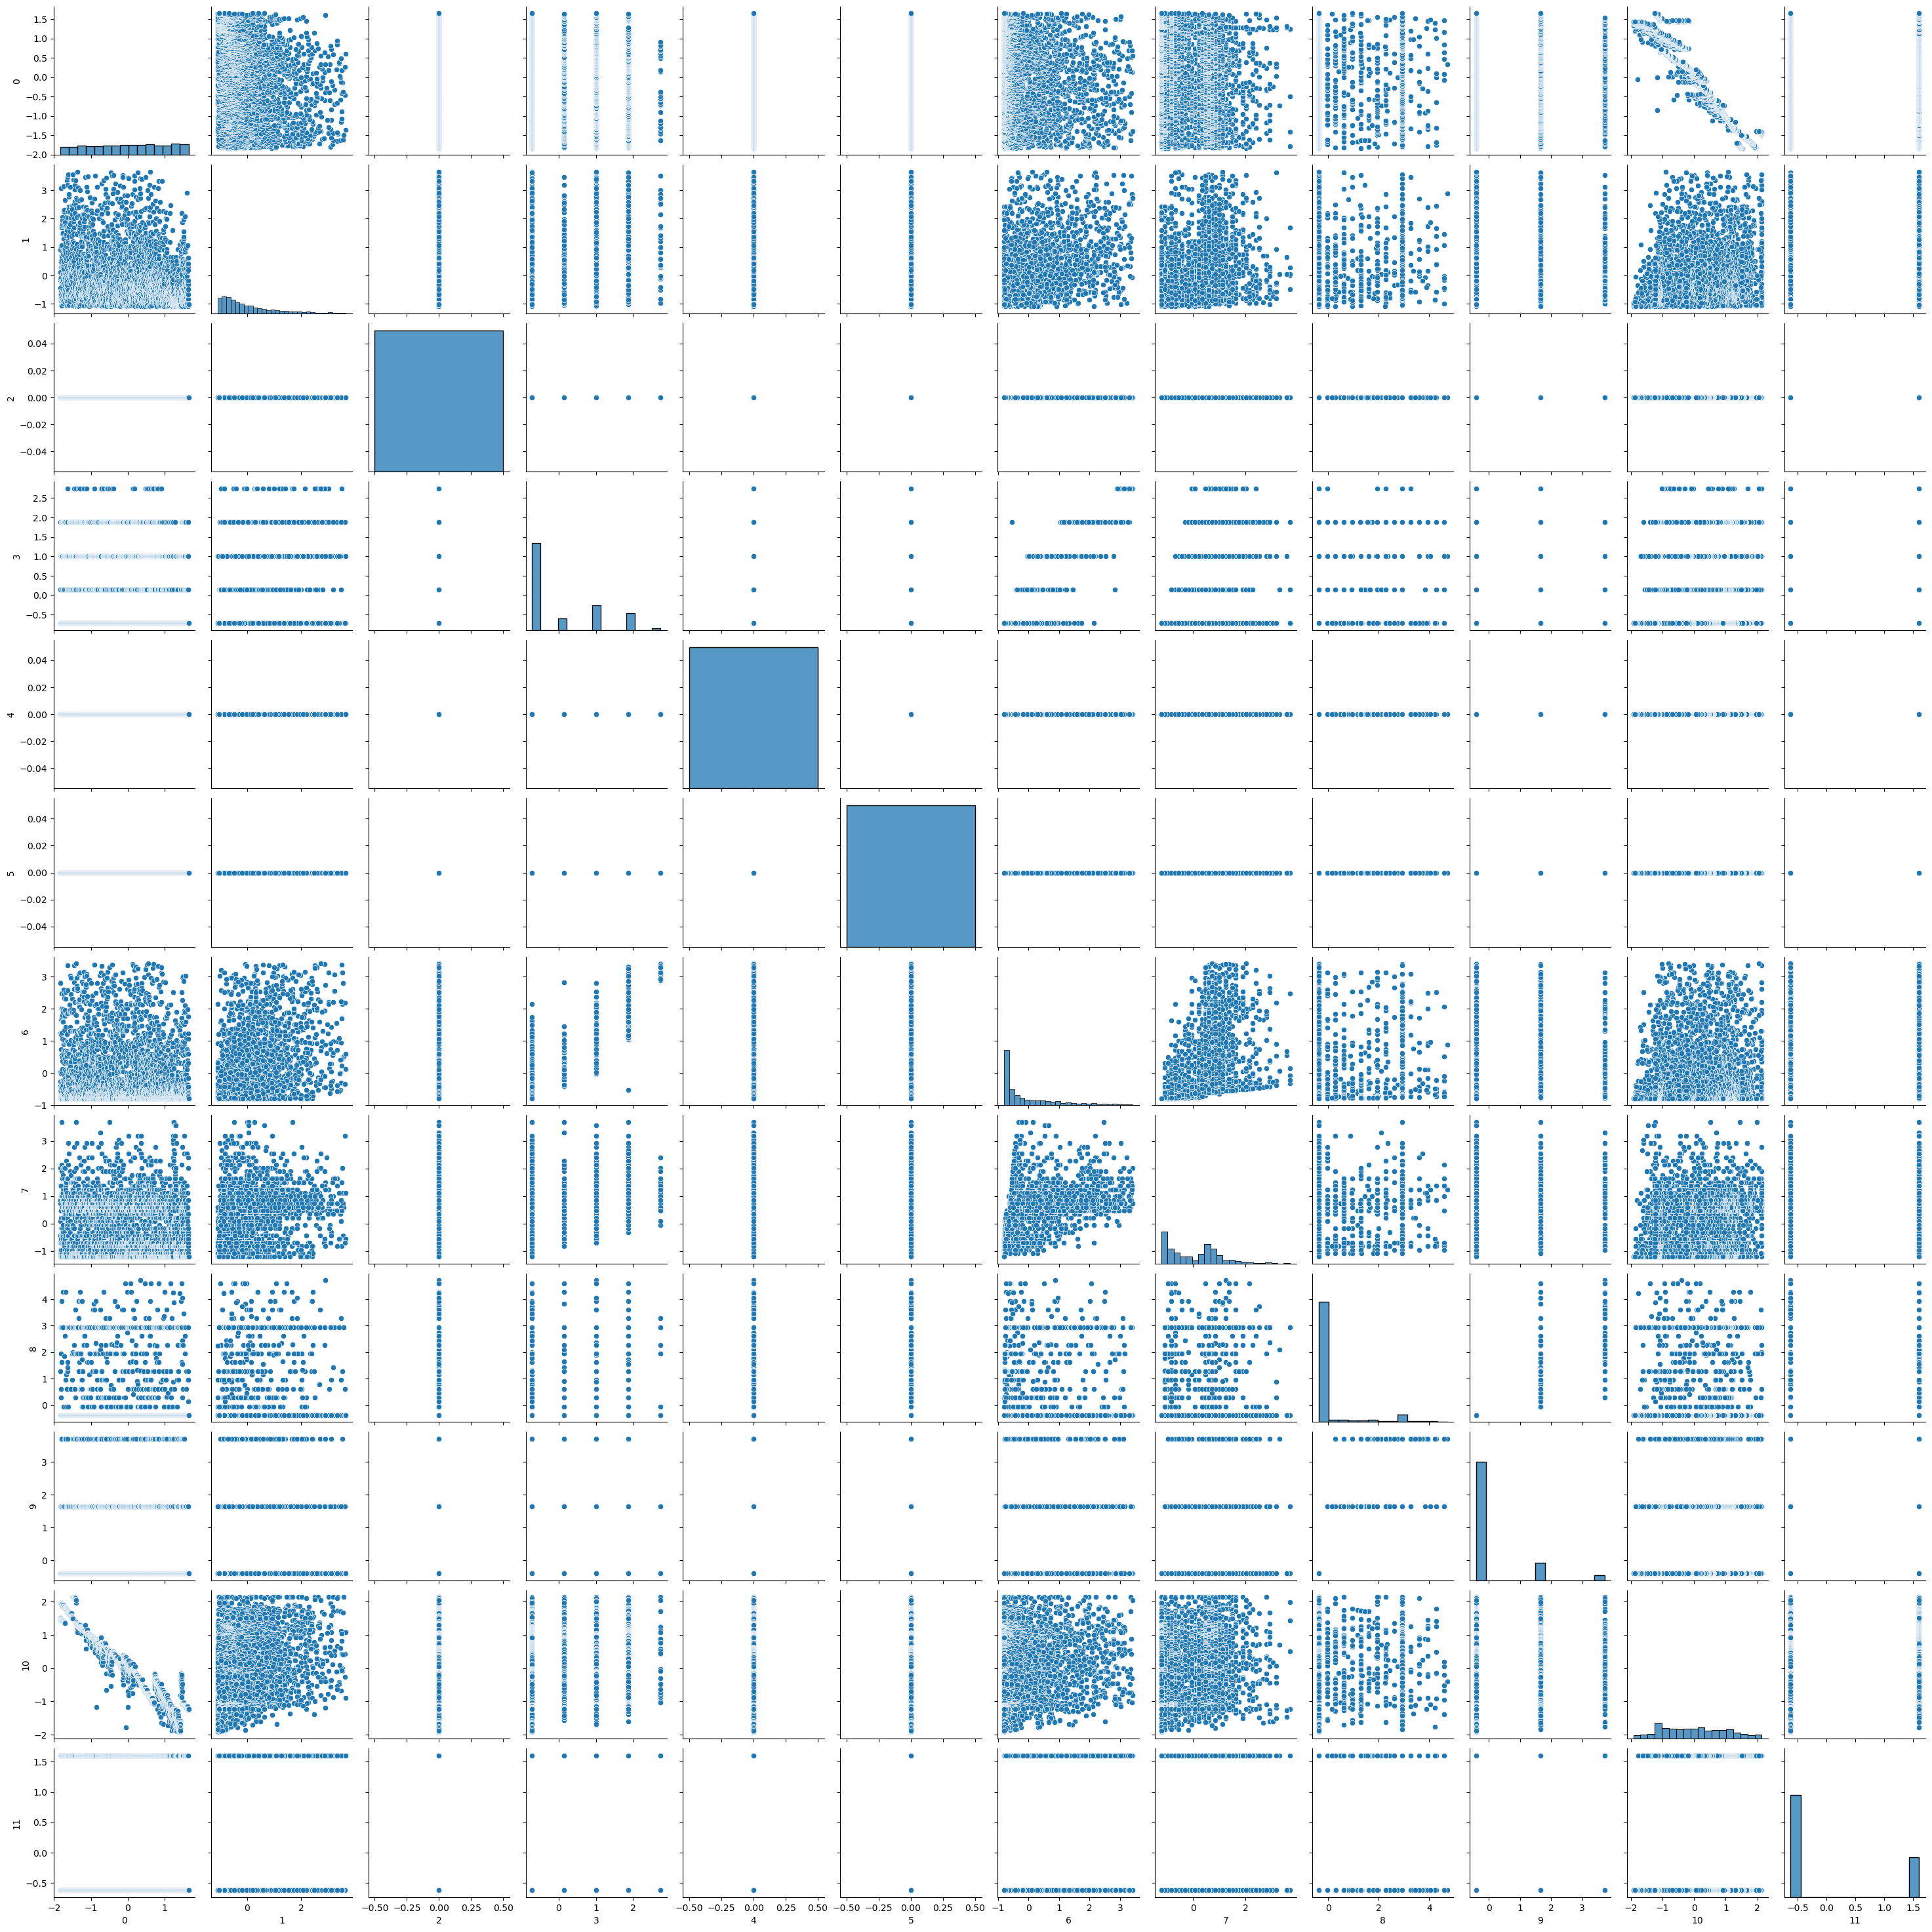

In [28]:
import seaborn as sns

sns.pairplot(pd.DataFrame(df_scaled))  # Convert scaled data to DataFrame
plt.show()

### 3 Implementing Clustering Algorithms

#### 1 K-Means Clustering

In [31]:
#K-Means requires selecting the optimal number of clusters (K).

##### Step 1: Finding the Optimal K (Elbow Method)

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_values = range(1, 11)  # Checking for K from 1 to 10

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)


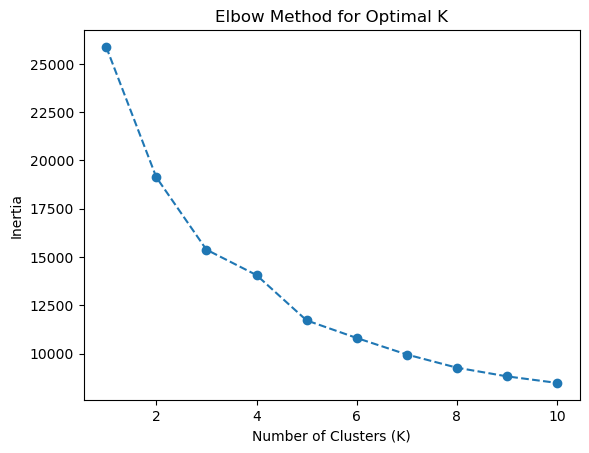

In [34]:
# Plot the Elbow Method Graph
plt.plot(K_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [35]:
# K lies between innertia 15000 and on 4 , thta is where the elbow point is 

##### Step 2: Applying K-Means

In [37]:
kmeans = KMeans(n_clusters=3, random_state=42)  # Use the chosen K
clusters_kmeans = kmeans.fit_predict(df_scaled)
df_cleaned['Cluster_KMeans'] = clusters_kmeans

C:\Users\DELL\AppData\Local\Temp\ipykernel_8488\3458592222.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster_KMeans'] = clusters_kmeans


In [38]:
df_cleaned = df_cleaned.copy()  # Create an explicit copy
df_cleaned['Cluster_KMeans'] = clusters_kmeans

#### 3.2 Hierarchical Clustering

In [40]:
#Unlike K-Means, hierarchical clustering does not require specifying K in advance.

##### Step 1: Creating a Dendrogram

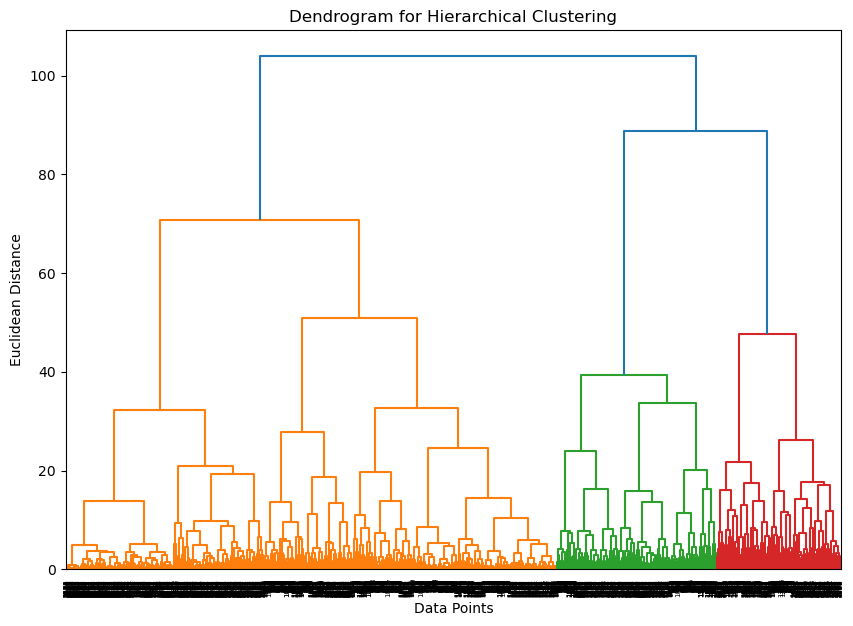

In [42]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

In [43]:
#The cut-off point in the dendrogram determines the number of clusters. There are 4 clusters

##### Step 2: Applying Agglomerative Clustering

In [45]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters_hc = hc.fit_predict(df_scaled)
df_cleaned['Cluster_HC'] = clusters_hc

In [46]:
clusters_hc

array([0, 0, 0, ..., 2, 1, 0], dtype=int64)

In [47]:
df_cleaned['Cluster_HC']

0       0
1       0
2       0
3       0
5       0
       ..
3994    1
3995    0
3996    2
3997    1
3998    0
Name: Cluster_HC, Length: 2875, dtype: int64

#### 3.3 DBSCAN Clustering

In [49]:
#DBSCAN groups points based on density rather than distance.

##### Step 1: Choosing Epsilon (ε) using k-Distance Graph

In [51]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)

In [52]:
neighbors_fit

NearestNeighbors()

In [53]:
distances, indices

(array([[0.        , 0.24601639, 0.24882106, 0.25855902, 0.28193259],
        [0.        , 0.16774313, 0.22642968, 0.24601639, 0.26284929],
        [0.        , 0.27487469, 0.39956084, 0.45452578, 0.47834416],
        ...,
        [0.        , 0.32259297, 0.44839196, 1.00740108, 1.15481969],
        [0.        , 0.57065143, 0.86513653, 0.89180385, 0.93785379],
        [0.        , 0.05083797, 0.1351813 , 0.14151295, 0.14540084]]),
 array([[   0,    1,   68,   67,   10],
        [   1,    3,   94,    0,   10],
        [   2,    9,  198,  218,  162],
        ...,
        [2872, 2776, 2715, 2771, 2569],
        [2873, 2568, 2796, 2600, 2397],
        [2874, 2857, 2834, 2802, 2852]], dtype=int64))

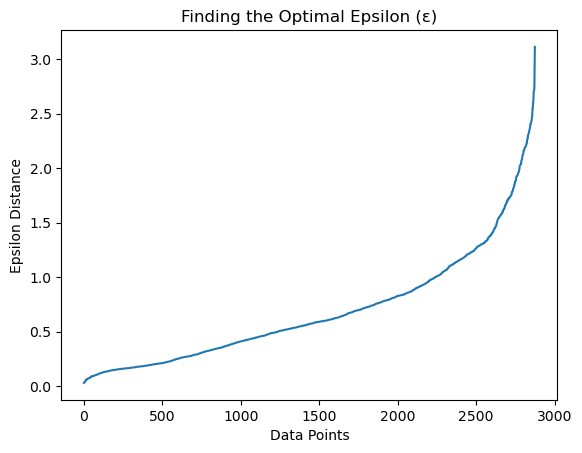

In [54]:
# Sort and plot k-distance
distances = np.sort(distances[:, 4], axis=0)
plt.plot(distances)
plt.xlabel("Data Points")
plt.ylabel("Epsilon Distance")
plt.title("Finding the Optimal Epsilon (ε)")
plt.show()

In [55]:
# ε is on the point 2500 Data Points and 1.0 Epsilon Distance

##### Step 2: Applying DBSCAN

In [57]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)  # Use tuned values
clusters_dbscan = dbscan.fit_predict(df_scaled)
df_cleaned['Cluster_DBSCAN'] = clusters_dbscan

In [58]:
clusters_dbscan

array([ 0,  0,  0, ..., -1, -1,  0], dtype=int64)

In [59]:
df_cleaned['Cluster_DBSCAN']

0       0
1       0
2       0
3       0
5       0
       ..
3994   -1
3995   -1
3996   -1
3997   -1
3998    0
Name: Cluster_DBSCAN, Length: 2875, dtype: int64

### 4 Visualizing Clusters

#####  K-Means Clustering

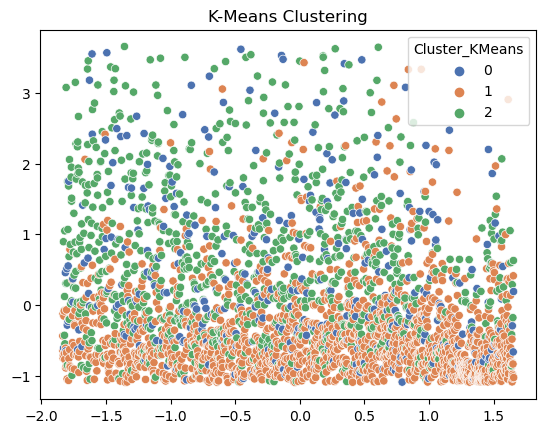

In [62]:
import seaborn as sns

sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=df_cleaned['Cluster_KMeans'], palette="deep")
plt.title("K-Means Clustering")
plt.show()


##### Hierarchical Clustering

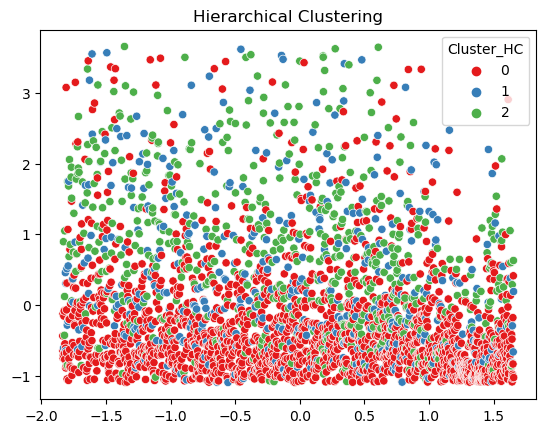

In [64]:
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=df_cleaned['Cluster_HC'], palette="Set1")
plt.title("Hierarchical Clustering")
plt.show()

##### DBSCAN Clustering

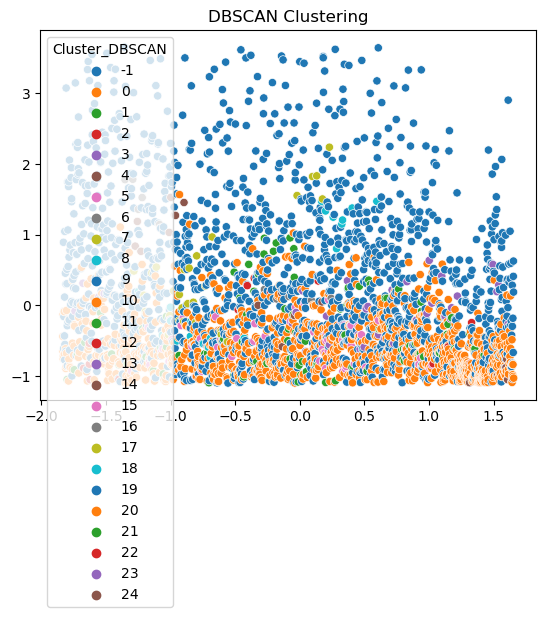

In [66]:
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=df_cleaned['Cluster_DBSCAN'], palette="tab10")
plt.title("DBSCAN Clustering")
plt.show()

### 5: Evaluating Cluster Performance

##### Silhouette Score

In [69]:
#Higher silhouette scores indicate better clustering.
from sklearn.metrics import silhouette_score

print("Silhouette Score for K-Means:", silhouette_score(df_scaled, clusters_kmeans))
print("Silhouette Score for DBSCAN:", silhouette_score(df_scaled, clusters_dbscan))

Silhouette Score for K-Means: 0.30830264215957265
Silhouette Score for DBSCAN: -0.33225832280910966


In [70]:
#K-Means works well when clusters are well-separated.
#Hierarchical Clustering provides a dendrogram but is computationally expensive.
#DBSCAN handles noise and detects arbitrary-shaped clusters.